# <u>Audio to Spectrogram - Tests</u>

### 1.0 Recording an audio clip

In [34]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

RATE = 16000
RECORD_SECONDS = 1
CHUNK = 1024
CHANNELS = 2

p = pyaudio.PyAudio()
stream = p.open(format = pyaudio.paInt16,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = CHUNK)

frames = []
for _ in range(int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
#     frames.append(np.fromstring(data, dtype=np.int16))
    frames.append(np.frombuffer(data, dtype=np.int16))
    
#Convert the list of numpy-arrays into a 1D array (column-wise)
data = np.hstack(frames)

# close stream
stream.stop_stream()
stream.close()
p.terminate()

### 2.0 Spectrograms of two seperate channels

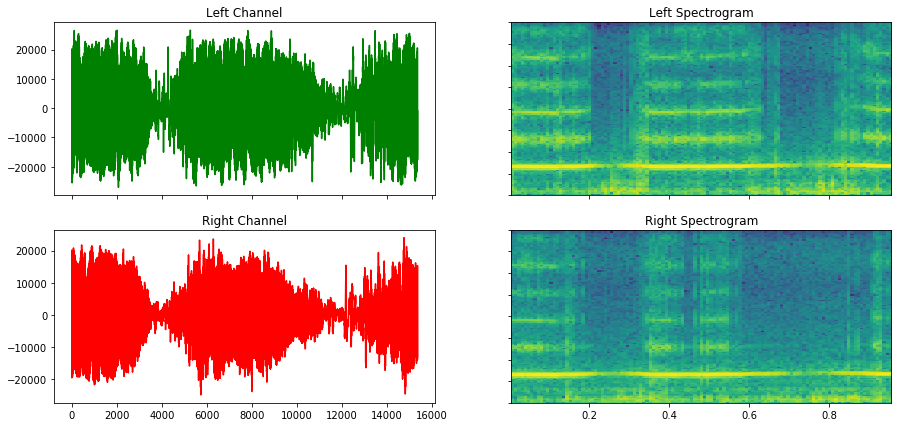

In [35]:
# seperating the two channels
dataL = data[0::2]  # select even index
dataR = data[1::2]  # select odd index

xL = np.arange(0,len(dataL))
xR = np.arange(0,len(dataR))

fig, axs = plt.subplots(2, 2, figsize=(15,7))

axs[0, 0].plot(xL,dataL,color='g')
axs[0, 0].set_title('Left Channel') 
axs[1, 0].plot(xR,dataR,color='r')
axs[1, 0].set_title('Right Channel') 

axs[0, 1].specgram(dataL,Fs=RATE)
axs[0, 1].set_title('Left Spectrogram') 
axs[1, 1].specgram(dataR,Fs=RATE)
axs[1, 1].set_title('Right Spectrogram')

for ax in axs.flat:
    ax.label_outer()

plt.show()

### 3.0 Spectrogram contaning mixed channel
- The mixed signals luckly arrange themselves as mirrored

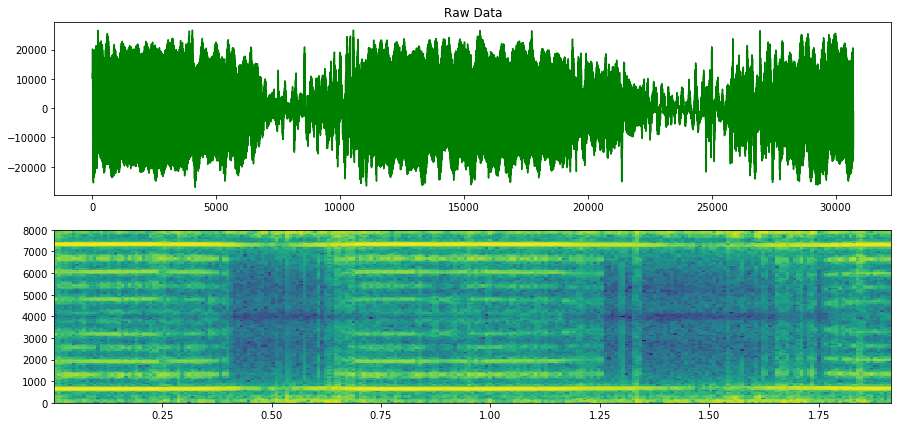

In [36]:
xL = np.arange(0,len(data))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,7))
ax1.plot(xL,data,color='g')
ax1.set_title('Raw Data') 
ax2.specgram(data,Fs=RATE)

plt.show()

### 3.1 Selecting a `grayscale` colormap
- [matplotlib color maps](https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html)

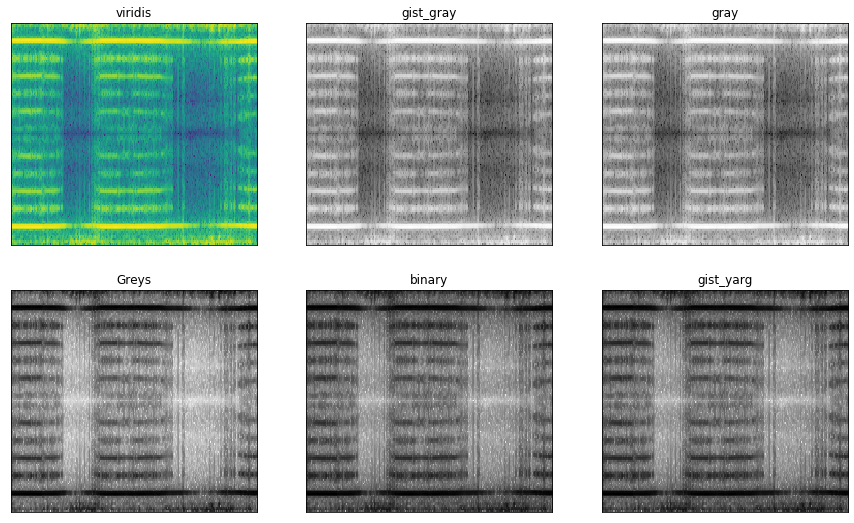

In [37]:
cmaps = ['viridis', 'gist_gray', 'gray', 'Greys', 'binary', 'gist_yarg' ]

plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.specgram(data, Fs=RATE, cmap=cmaps[i])
    plt.title(cmaps[i])
plt.show()

### 4.0 Saving the plot

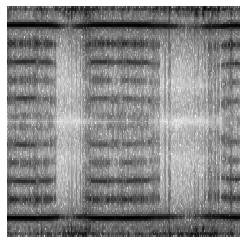

In [38]:
plt.figure(figsize=(4.16,4.24))            # figsize=(4.16,4.24) with (dpi=40) produce a 128x128 image
plt.specgram(data, Fs=RATE, cmap='Greys')
plt.box(False)
plt.xticks([])
plt.yticks([])

plt.savefig('imageSet/myfig.png', bbox_inches='tight', pad_inches=0, dpi=40)

# plt.show()